# TrAnET Pipeline

This notebook contains the steps to run the demo of the `TrAnET` system, in particular: 

1) Dataset cleaning and topic model computation 
2) Topics assignment
3) Topic diffusion analysis

### Precomputed model and assignments
A precomputed model, used during experiments, is available within the folder `demo_files`. Unzip the content of the archive and copy the files in the input/output folder specified within the `config.py` configuration file. 

The precomputed model refers to the following parameters: 

    training_starting_year      = 2000
    training_ending_year        = 2014
    number_of_topics_to_extract = 50
    training_venues             = sv.considered_venues
    
    use_lemmer                  = True
    min_doc_frequency           = 2
    max_doc_frequency           = 0.8

    analysis_starting_year      = 2000
    analysis_ending_year        = 2014
    analysis_venues             = sv.considered_venues
    
   

In [1]:
import sys
sys.path.append('..')

# print('Path configured.')

import config
import topic_modeling
from utilities import selected_venues as sv

print('Loaded configurations:\n')
template = '{0}: {1}'

print(template.format('Mongodb host', config.__host))
print(template.format('Mongodb port', config.__port))
print(template.format('Mongodb database name', config.__db_name))
print(template.format('Mongodb collection name', config.__collection_name))
print('')
print(template.format('Path of the input/output folder', config.__inputs_outputs_folder_path))
print(template.format('Absolute path of the resources folder', config.__resources_folder_path))

Loaded configurations:

Mongodb host: localhost
Mongodb port: 27014
Mongodb database name: scipub
Mongodb collection name: dblp_papers

Path of the input/output folder: /Users/valentinarho/Downloads/ida-topic-model
Absolute path of the resources folder: /Users/valentinarho/Dropbox/pkdd_demo/resources


# Topic model training

Define the needed parameters and run the computation. The model will be stored in the input/output folder.

In [2]:
# the starting year to train the model 
training_starting_year      = 2000
# the ending year to train the model 
training_ending_year        = 2014
# the number of topics to search for 
number_of_topics_to_extract = 50
# venues to consider
training_venues             = sv.considered_venues

# Cleaning parameters 
# use the lemmer to standardize terms
use_lemmer                  = True
# terms that appears in less than min_doc_frequency documents are ignored
min_doc_frequency           = 2
# terms that appears in more than max_doc_frequency * n_documents documents are ignored
max_doc_frequency           = 0.8

In [ ]:
topic_modeling.compute_topic_model(training_starting_year, training_ending_year, training_venues, number_of_topics_to_extract, use_lemmer, min_doc_frequency, max_doc_frequency)

Model loaded.


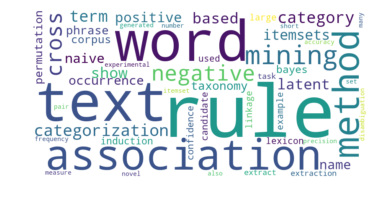

In [3]:
# Load the computed topic model and print a topic wordcloud
topic_model = topic_modeling.load_saved_model(training_starting_year, training_ending_year, training_venues, number_of_topics_to_extract, output_folder=config.__inputs_outputs_folder_path)

print('Model loaded.')

topic_id = number_of_topics_to_extract - 1
topic_description = topic_model.show_topic(topic_id, 50)
topic_modeling.generate_wordcloud(topic_description, use_mask='rect', store_to_file=False)

# Topics assignment

Define the needed parameters and run the computation. The topic assignments will be stored in a csv file in the input/output folder. 

In [2]:
# Parameters of the model to load 

# the starting year to train the model 
training_starting_year      = 2000
# the ending year to train the model 
training_ending_year        = 2014
# the number of topics to search for 
number_of_topics_to_extract = 50
# venues to consider
training_venues             = sv.considered_venues

# Parameters of the documents to assign 

# the starting year to train the model 
analysis_starting_year      = 2000
# the ending year to train the model 
analysis_ending_year        = 2014
# venues to consider
analysis_venues             = sv.considered_venues

In [ ]:
topic_modeling.assign_topics_and_save(training_starting_year, training_ending_year, number_of_topics_to_extract,
                               analysis_starting_year, analysis_ending_year, training_venues=training_venues,
                               analysis_venues=analysis_venues)

# Topics diffusion



In [ ]:
TODO 